# Analysis and Visualization of data related to Indian Food. 

#### Data of about 250+ dishes from Indian cuisine.

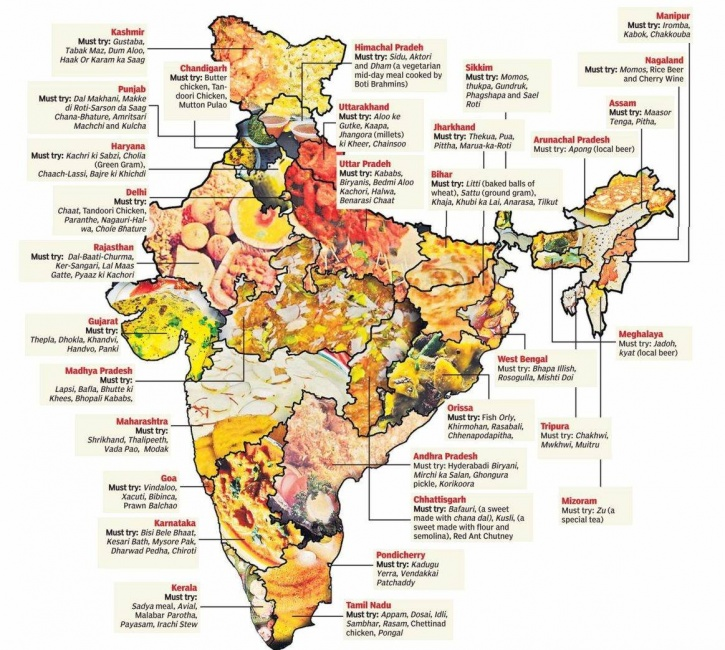

### Columns in dataset:
    
name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#Exploring the data from Times higher education
data  = pd.read_csv("indian_food.csv")
print("The dimension of the table is ", data.shape)
data.head()
data.describe()
data.info()

The dimension of the table is  (255, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [3]:
total_null = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region,1,0.003922
state,0,0.000000
course,0,0.000000
flavor_profile,0,0.000000
cook_time,0,0.000000
prep_time,0,0.000000
diet,0,0.000000
ingredients,0,0.000000
name,0,0.000000


In [6]:
#Dropping values
missing_data = data.dropna(inplace=True)
missing_data

In [13]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


### Insights:

1.Vegetarian vs Non-Vegetarian states

2.Food items with longest meal prep times

3.Food items with longest meal cook times

4.ingredients vs prep time & cook time.

5.State with fastest prep & cook times.


In [16]:
#Vegetarian vs Non-Vegetarian States
data['diet'].value_counts(ascending=True)

non vegetarian     29
vegetarian        225
Name: diet, dtype: int64

<AxesSubplot:xlabel='diet', ylabel='count'>

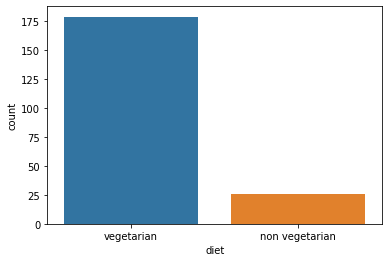

In [40]:
sns.countplot(x='diet',data=data)

<AxesSubplot:xlabel='course', ylabel='count'>

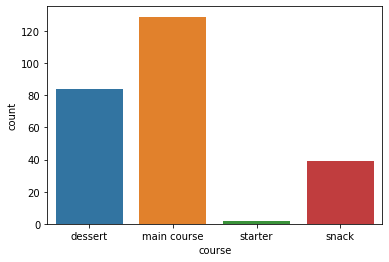

In [18]:
sns.countplot(x='course',data=data)

In [26]:
data.drop(data[data['state']=="-1"].index, inplace = True) 
data.drop(data[data['flavor_profile']=="-1"].index, inplace = True) 

<AxesSubplot:xlabel='count', ylabel='state'>

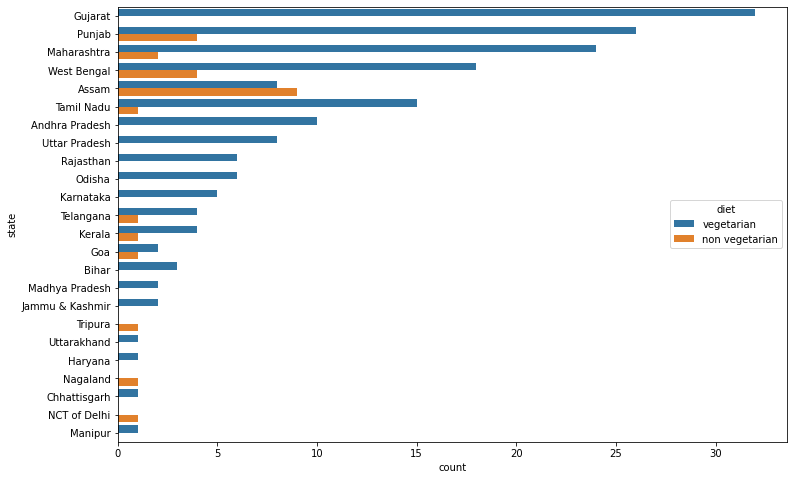

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(y='state',hue='diet',data=data,order = data['state'].value_counts().index)

<AxesSubplot:xlabel='flavor_profile', ylabel='count'>

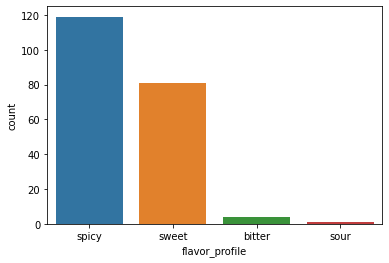

In [29]:
#Analysing the flavor type
sns.countplot(x='flavor_profile',data=data,order = data['flavor_profile'].value_counts().index)

In [30]:
#highest prep time dishes. 
g1 = data.loc[data.prep_time > 1,['name', 'prep_time']].sort_values(by='prep_time',ascending=False)['name'].head(10)
g1

114            Pindi chana
29               Misti doi
123    Tandoori Fish Tikka
66          Chak Hao Kheer
122       Tandoori Chicken
48                Poornalu
33               Ras malai
46          Obbattu holige
124                   Attu
81           Chicken Tikka
Name: name, dtype: object

<AxesSubplot:xlabel='prep_time', ylabel='name'>

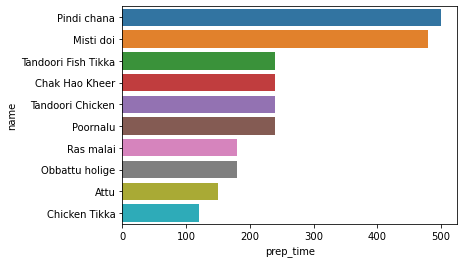

In [31]:
#TOP 10 DISHES WHICH TAKE THE LONGEST PREPARATION TIME
sns.barplot(y=data[data.prep_time > 1].sort_values(by='prep_time',ascending=False)['name'].head(10),x='prep_time',data=data)

<AxesSubplot:xlabel='cook_time', ylabel='name'>

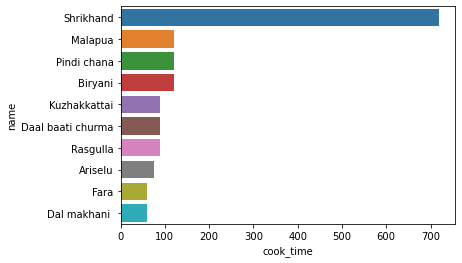

In [32]:
#TOP 10 DISHES WHICH TAKE THE LONGEST COOKING TIME
sns.barplot(y=data[data.prep_time > 1].sort_values(by='cook_time',ascending=False)['name'].head(10),x='cook_time',data=data)

<AxesSubplot:xlabel='region', ylabel='count'>

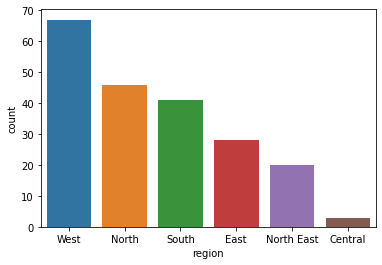

In [33]:
#Count based on region.
sns.countplot(x='region',data=data,order = data['region'].value_counts().index)